<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:**
- **Input Layer:**
- **Hidden Layer:**
- **Output Layer:**
- **Activation:**
- **Backpropagation:**


## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

candy = pd.read_csv('chocolate_gummy_bears.csv')

In [2]:
candy.head()

,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. You will not be able to achieve more than ~50% with the simple perceptron. Explain why you could not achieve a higher accuracy with the *simple perceptron* architecture, because it's possible to achieve ~95% accuracy on this dataset. Provide your answer in markdown (and *optional* data anlysis code) after your perceptron implementation. 

In [3]:
# Start your candy perceptron here

X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values
X_train = X[0:7500]
y_train = y[0:7500]
X_test = X[7500:10000]
y_test = y[7500:10000]

In [4]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
pn = Perceptron(0.05, 5)
pn.fit(X_train, y_train)

In [6]:
from sklearn.metrics import accuracy_score
pred = pn.predict(X_test)
accuracy_score(pred, y_test)

0.5048

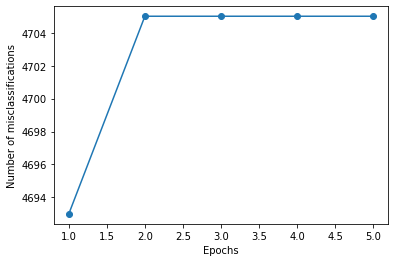

In [7]:
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [10]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 2
        self.hiddenNodes = 10
        self.outputNodes = 7500

        # Initial Weights
       
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
       
        # Hidden to Output
        
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
       
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        
        return self.activated_output
    
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        
        # Error in Output
        
        self.o_error = y - o
        
        # Apply Derivative of Sigmoid to error
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        # How much of that "far off" can explained by the input => hidden
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)
        # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
# Output
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

In [11]:
nn = NeuralNetwork()

In [12]:
print(f'''
L1|Wgt: \n{nn.weights1}
L2|Wgt: \n{nn.weights2}
''')


L1|Wgt: 
[[0.63488144 0.96048945 0.89066323 0.62509437 0.63154018 0.91893622
  0.86966194 0.18911396 0.65174836 0.18879818]
 [0.42134171 0.35505333 0.74413269 0.71336015 0.55820764 0.6112615
  0.82637853 0.89272078 0.67221697 0.2620719 ]]
L2|Wgt: 
[[0.93357745 0.18248358 0.49407112 ... 0.80410661 0.77379211 0.14159058]
 [0.16874105 0.92034235 0.97332326 ... 0.99998149 0.47292182 0.77976645]
 [0.96851517 0.31504691 0.2884559  ... 0.84941404 0.52464953 0.94305007]
 ...
 [0.77091032 0.03063851 0.60772247 ... 0.73940857 0.65717272 0.81166601]
 [0.82216281 0.07262991 0.38101653 ... 0.20267276 0.01460617 0.2292294 ]
 [0.54007813 0.59591015 0.90584373 ... 0.69152625 0.04165884 0.81063841]]



In [13]:
X_train.shape, y_train.shape

((7500, 2), (7500,))

In [14]:
output = nn.feed_forward(X_train)
print(f'''
IN: \n{candy.values}
OT: \n{output}
''')


IN: 
[[0 1 1]
 [1 0 1]
 [0 1 1]
 ...
 [0 1 1]
 [0 1 1]
 [1 0 1]]
OT: 
[[0.98460684 0.93870218 0.97838246 ... 0.98585614 0.94918971 0.97961992]
 [0.98461137 0.94784903 0.97982949 ... 0.98704034 0.95081801 0.98085934]
 [0.98460684 0.93870218 0.97838246 ... 0.98585614 0.94918971 0.97961992]
 ...
 [0.99296025 0.96602543 0.9895761  ... 0.99391229 0.97115404 0.99044004]
 [0.98461137 0.94784903 0.97982949 ... 0.98704034 0.95081801 0.98085934]
 [0.98461137 0.94784903 0.97982949 ... 0.98704034 0.95081801 0.98085934]]



In [ ]:
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        nice = nn.feed_forward(X_train)
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X_train)
        print('Actual Output: \n', y_train)
        print('Predicted Output: \n', str(nice))
        print("Loss: \n", str(np.mean(np.square(y_train - nn.feed_forward(X_train)))))
    nn.train(X_train,y_train)

+---------EPOCH 1---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [1 1]
 [1 0]
 [1 0]]
Actual Output: 
 [1 1 1 ... 0 1 1]
Predicted Output: 
 [[0.98460684 0.93870218 0.97838246 ... 0.98585614 0.94918971 0.97961992]
 [0.98461137 0.94784903 0.97982949 ... 0.98704034 0.95081801 0.98085934]
 [0.98460684 0.93870218 0.97838246 ... 0.98585614 0.94918971 0.97961992]
 ...
 [0.99296025 0.96602543 0.9895761  ... 0.99391229 0.97115404 0.99044004]
 [0.98461137 0.94784903 0.97982949 ... 0.98704034 0.95081801 0.98085934]
 [0.98461137 0.94784903 0.97982949 ... 0.98704034 0.95081801 0.98085934]]
Loss: 
 0.45583716225320114


/Users/maximevacher-materno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


+---------EPOCH 2---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [1 1]
 [1 0]
 [1 0]]
Actual Output: 
 [1 1 1 ... 0 1 1]
Predicted Output: 
 [[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]
Loss: 
 0.1866666672212677
+---------EPOCH 3---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [1 1]
 [1 0]
 [1 0]]
Actual Output: 
 [1 1 1 ... 0 1 1]
Predicted Output: 
 [[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]
Loss: 
 0.1866666672157802
+---------EPOCH 4---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [1 1]
 [1 0]
 [1 0]]
Actual Output: 
 [1 1 1 ... 0 1 1]
Predicted Output: 
 [[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5

P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1


In [22]:
sc = StandardScaler()
df = sc.fit_transform(df)
# split 
X = df[:,:-1]
y = df[:,-1]

print(X.shape)
print(y.shape)

(303, 13)
(303,)


/Users/maximevacher-materno/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maximevacher-materno/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
# Hyperparams
inputs = X.shape[1]
epochs = 25
b_size = 250

# Create model
def create_model():
    
    model = Sequential()
    model.add(Dense(96, input_shape=(inputs,), activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(1, activation='relu'))

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {'batch_size': [10, 30, 50, 100],
              'epochs':[5,10, 20]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=0)
grid_result = grid.fit(X, y)

/Users/maximevacher-materno/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8217821717262268 using {'batch_size': 10, 'epochs': 20}
Means: 0.6798679927984873, Stdev: 0.16375756603332123 with: {'batch_size': 10, 'epochs': 5}
Means: 0.6963696380456289, Stdev: 0.17040699654348213 with: {'batch_size': 10, 'epochs': 10}
Means: 0.8217821717262268, Stdev: 0.05301113405032084 with: {'batch_size': 10, 'epochs': 20}
Means: 0.7557755907376608, Stdev: 0.04667370101995413 with: {'batch_size': 30, 'epochs': 5}
Means: 0.8184818426767985, Stdev: 0.025986816922028384 with: {'batch_size': 30, 'epochs': 10}
Means: 0.8217821717262268, Stdev: 0.03523787151819811 with: {'batch_size': 30, 'epochs': 20}
Means: 0.5643564462661743, Stdev: 0.14025431949143605 with: {'batch_size': 50, 'epochs': 5}
Means: 0.7953795393308004, Stdev: 0.05678100794290375 with: {'batch_size': 50, 'epochs': 10}
Means: 0.8052805264790853, Stdev: 0.0336568844486241 with: {'batch_size': 50, 'epochs': 20}
Means: 0.5511551300684611, Stdev: 0.04068918921340226 with: {'batch_size': 100, 'epochs': 5}
Means: 0.